In [ ]:
# intervalltransformation
import numpy as np
def transQ(Q_in, a,b):
    #check array
    if not isinstance(Q_in, array):
        print "array input expected"
    # m,n    
    m = np.amax(Q_in.shape)
    n = (Q_in(0)).shape[0]
    #Q_out = np.zeros((Q_in.shape))
    for i1 in range (0,m-1): 
        Q_out[i1,:] = Q_in[i1,:]
        for i2 in range (i1+1, m-1):
            Q_out[i1,:] = Q_out[i1,] + (b**(i2-i1))*nchoosek(i2,i1)*Q_in[i2,:];
        Q_out[i1,] = (a**i1)*Q_out[i1,]
    # nested loop
    return Q_out

In [56]:
# intervalltransformation
import numpy as np
def calcQsum(Q_in):
    if not isinstance(Q_in, array):
        print "array input expected"
    m = np.amax(Q_in.shape)
    n = (Q_in(0)).shape[0]
    if m == 1:
        Q_sum = np.matrix([[2*Q_in[0,:], np.zeros((n,n))], 
                          [np.zeros((n,n)), np.zeros((n,n))]])
    elif m == 2:
        Q_sum = np.matrix([[2*Q_in[0,:], Q_in[1,:]],
                           [Q_in[1,:], np.zeros((n,n))]])
    else:
        Q_sum = np.matrix([[2*Q_in[0,:], Q_in[1,:]], 
                           [Q_in[1,:], 2*Q_in[2,:]]])
        
    loopRange = np.arange(4,m,2)
    for i1 in loopRange:
        if i1 != m:
            Q_sum = np.matrix[[Q_sum, [np.zeros(((i1/2-1)*n,n)), 
             Q_in[i1,:]]], np.zeros(n,(i1/2-1)*n), 
             Q_in[i1-1,:],  2*Q_in[i1,:]];
        else:
            Q_sum = np.matrix[[Q_sum, [np.zeros(((i1/2-1)*n,n)), 
             Q_in[i1,:]]], np.zeros(n,(i1/2-1)*n), 
             Q_in[i1-1,:], np.zeros((n,n))];
    Q_sum = 1/2*Q_sum;
    return Q_sum

In [57]:
# Selection stratergy
# plotting Boundary with given p
# g(p,x) = e(p).x^T.R.x-1
# p: (0 ,1]
# R: 
# a_head: coefficiences os fixed-"zulegenden" characteristic 
# Polynomials des closed control-loop with p = 1
# a: coefficiences of characteristic "Strecke" 
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import MatrixSymbol, Matrix
def boundaryPlotting_LyapunovFunction(p, R, a_head, a):
    
    n = np.size(a_head,0)    
    p_array = np.zeros(n)
    
    for i in range(0, n) :
        p_array[i] = np.power(p, n-i)        
    D_p = np.diag(p_array)
    
    K_p = inv(D_p).dot(a_head) - a    
    R_p = inv(D_p).dot(R).dot(inv(D_p))    
    e_p = np.transpose(K_p).dot(inv(R_p)).dot(K_p)
    
    print "R1 = \n",R
    print "a_head = \n",a_head
    print "a = \n",a
    print "n = \n",n
    print "D_p = \n",D_p
    print "K_p = \n",K_p
    print "R_p = \n",R_p    
    print "e_p = \n",e_p
    
    for x1 in np.arange(-0.5,0.5,0.004):
        for x2 in np.arange(-0.5,0.5,0.001):
            X = np.matrix([[x1],[x2]])            
            #print X.T
            g_px = np.asscalar(e_p)*(X.T).dot(R_p).dot(X)-1
            # print g_px
            if (abs(g_px) <= 0.01):
                plt.plot(x1, x2, 'ro',label='closed')
    plt.show()

R1 = 
[[4 1]
 [1 2]]
a_head = 
[[2]
 [2]]
a = 
[[0]
 [0]]
n = 
2
D_p = 
[[ 0.99998  0.     ]
 [ 0.       0.99999]]
K_p = 
[[ 2.00004]
 [ 2.00002]]
R_p = 
[[ 4.00016  1.00003]
 [ 1.00003  2.00004]]
e_p = 
[[ 2.28571429]]


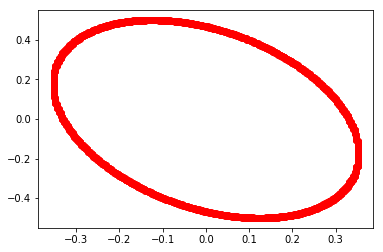

In [58]:
R1 = np.matrix([[4, 1],
                    [1, 2]])  
    
a_head = np.matrix([[2],
                        [2]]) 
    
a = np.matrix([[0],
                   [0]])
boundaryPlotting_LyapunovFunction(0.99999,  R1, a_head, a)
#boundaryPlotting_LyapunovFunction(0.5)